輸入立委臉書粉專內容及選舉政見資料

注意!jieba函式庫非內建需要額外下載:https://pypi.org/project/jieba/

In [1]:
import pandas as pd#引入環境內建函式庫pandas並簡寫其為pd\n
import jieba#引入斷詞函式庫jieba
from tqdm import tqdm#視覺化進度條模組，可以看斷詞迭代的進度
fb = pd.read_csv('nysu_10902_2019_research_right.csv')#用函式panda從電腦端資料夾中讀入csv數據庫並命名
politics = pd.read_csv('9th_legislator_promise.csv')

以新北市立委黃國昌為例，建立發文文字斷詞表

---



In [3]:
huang = fb[fb.page_name == "黃國昌"]#將粉專的資料庫從fb數據庫內抓出
huang.head(1)#叫出資料集中第一筆資料來看

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19360,449664581882455_1987236371392129,449664581882455,黃國昌,政治人物,【記者會直播中】\n\n「全面修補制度漏洞 才能遏止虐童悲劇」記者會\n時間：2019年01...,黃國昌的直播影片。,video,https://www.facebook.com/kcfor2016/videos/1987...,2019-01-15T01:30:35+0000,2019-01-15T09:30:35,...,NaN,NaN,2797,0,0,0,0,0,415,186


In [4]:
huang[huang.created_time_taipei == max(huang.created_time_taipei)]#抓出發文時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
20009,449664581882455_1359108877604683,449664581882455,黃國昌,政治人物,2020年強檔鉅獻：最值得您期待的卡司\n \n一個不會被收買的團隊\n一股最有力的監督力量...,NaN,video,https://www.facebook.com/449664581882455/posts...,2019-12-26T12:34:44+0000,2019-12-26T20:34:44,...,2020年強檔鉅獻：最值得您期待的卡司,NaN,6404,0,0,0,0,0,182,175


In [5]:
huang[huang.created_time_taipei == min(huang.created_time_taipei)]#抓出發文時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19374,449664581882455_1091137621068478,449664581882455,黃國昌,政治人物,去年夏天，我直言批評：「屏東縣充斥著貪污、賄選的腐敗豬仔民代」，中國國民黨說要嚴肅回應。結果...,NaN,link,https://www.facebook.com/449664581882455/posts...,2019-01-01T13:36:28+0000,2019-01-01T21:36:28,...,屏東地檢對30名當選人提當選無效之訴 含5議員、3鄉鎮長 | 聯合新聞網,屏東地檢署今針對5名縣議員、3名鄉鎮長及16名鄉鎮市民代表及6名村里長等總計30人，依公職人...,7554,0,0,0,0,0,184,231


In [6]:
huang['new_date'] = pd.to_datetime(huang['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
huang['month_year'] = pd.to_datetime(huang['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)
huang.head(1)

<ipython-input-6-672ad2ee3f2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huang['new_date'] = pd.to_datetime(huang['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
<ipython-input-6-672ad2ee3f2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huang['month_year'] = pd.to_datetime(huang['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19360,449664581882455_1987236371392129,449664581882455,黃國昌,政治人物,【記者會直播中】\n\n「全面修補制度漏洞 才能遏止虐童悲劇」記者會\n時間：2019年01...,黃國昌的直播影片。,video,https://www.facebook.com/kcfor2016/videos/1987...,2019-01-15T01:30:35+0000,2019-01-15T09:30:35,...,2797,0,0,0,0,0,415,186,2019-01-15,2019-01


In [7]:
huang = huang.sort_values(by=['like_count'],ascending=0)#將資料以按讚數進行排列(ascending為0降序排)
huang

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19565,449664581882455_1195552010627038,449664581882455,黃國昌,政治人物,是的，623，總來。\n\n昨天上午，我已經將6月23日的凱道路權借下來了。\n昨天深夜，館...,NaN,status,https://www.facebook.com/449664581882455/posts...,2019-06-13T00:52:00+0000,2019-06-13T08:52:00,...,67855,0,0,0,0,0,2040,3762,2019-06-13,2019-06
19993,449664581882455_1333183330197238,449664581882455,黃國昌,政治人物,揭發國安私菸弊案後，我被綠營痛罵：中共同路人、國民黨側翼，為何不監督韓國瑜？\n\n揭發圈地...,NaN,status,https://www.facebook.com/449664581882455/posts...,2019-11-30T10:31:49+0000,2019-11-30T18:31:49,...,50946,0,0,0,0,0,2340,1738,2019-11-30,2019-11
20004,449664581882455_1331252363723668,449664581882455,黃國昌,政治人物,特權掠奪國家資源、韓李家族發大財\n\n瞭解我問政風格的朋友都知道，我十分痛恨政治人物濫用權...,NaN,photo,https://www.facebook.com/449664581882455/posts...,2019-11-28T11:49:55+0000,2019-11-28T19:49:55,...,50071,0,0,0,0,0,3095,5160,2019-11-28,2019-11
19602,449664581882455_1203219556526950,449664581882455,黃國昌,政治人物,清晨，在凱道最後確認，向徹夜忙碌的智偉與工作人員致謝。\n\n看著被雨水濕透的路面，我說「這...,NaN,photo,https://www.facebook.com/449664581882455/posts...,2019-06-23T00:43:25+0000,2019-06-23T08:43:25,...,49418,0,0,0,0,0,1131,679,2019-06-23,2019-06
19600,449664581882455_1203549703160602,449664581882455,黃國昌,政治人物,謝謝每一位站出來的朋友\n\n拒絕紅色媒體、守護台灣民主 我們一起繼續努力！,NaN,status,https://www.facebook.com/449664581882455/posts...,2019-06-23T10:37:29+0000,2019-06-23T18:37:29,...,48269,0,0,0,0,0,975,166,2019-06-23,2019-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19765,449664581882455_1255965031252402,449664581882455,黃國昌,政治人物,【國昌報告第十集：從一則突遭下架的新聞談起】\n\n今晚內容精要：\n\n➡回顧昨日囤房稅公...,NaN,video,https://www.facebook.com/449664581882455/posts...,2019-09-05T14:34:50+0000,2019-09-05T22:34:50,...,1142,0,0,0,0,0,135,23,2019-09-05,2019-09
19853,449664581882455_1276422189206686,449664581882455,黃國昌,政治人物,黃國昌全國巡迴演講第六場\n「台灣的下一步」高雄場，開放購票！\n\n前五場演講，我分別以「...,NaN,link,https://www.facebook.com/449664581882455/posts...,2019-10-01T12:00:27+0000,2019-10-01T20:00:27,...,1140,0,0,0,0,0,53,33,2019-10-01,2019-10
19778,449664581882455_1252064304975808,449664581882455,黃國昌,政治人物,【演講直播預告】\n「台灣的下一步」全國巡迴演講台南全美戲院場\n\n今天晚上，我將在台南舉...,NaN,link,https://www.facebook.com/449664581882455/posts...,2019-08-31T08:31:47+0000,2019-08-31T16:31:47,...,804,0,0,0,0,0,26,23,2019-08-31,2019-08
20019,449664581882455_1356812981167606,449664581882455,黃國昌,政治人物,NaN,黃國昌更新了封面相片。,photo,https://www.facebook.com/449664581882455/posts...,2019-12-24T09:01:38+0000,2019-12-24T17:01:38,...,538,0,0,0,0,0,33,23,2019-12-24,2019-12


In [8]:
huang.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列(從0開始)
huang

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
0,19565,449664581882455_1195552010627038,449664581882455,黃國昌,政治人物,是的，623，總來。\n\n昨天上午，我已經將6月23日的凱道路權借下來了。\n昨天深夜，館...,NaN,status,https://www.facebook.com/449664581882455/posts...,2019-06-13T00:52:00+0000,...,67855,0,0,0,0,0,2040,3762,2019-06-13,2019-06
1,19993,449664581882455_1333183330197238,449664581882455,黃國昌,政治人物,揭發國安私菸弊案後，我被綠營痛罵：中共同路人、國民黨側翼，為何不監督韓國瑜？\n\n揭發圈地...,NaN,status,https://www.facebook.com/449664581882455/posts...,2019-11-30T10:31:49+0000,...,50946,0,0,0,0,0,2340,1738,2019-11-30,2019-11
2,20004,449664581882455_1331252363723668,449664581882455,黃國昌,政治人物,特權掠奪國家資源、韓李家族發大財\n\n瞭解我問政風格的朋友都知道，我十分痛恨政治人物濫用權...,NaN,photo,https://www.facebook.com/449664581882455/posts...,2019-11-28T11:49:55+0000,...,50071,0,0,0,0,0,3095,5160,2019-11-28,2019-11
3,19602,449664581882455_1203219556526950,449664581882455,黃國昌,政治人物,清晨，在凱道最後確認，向徹夜忙碌的智偉與工作人員致謝。\n\n看著被雨水濕透的路面，我說「這...,NaN,photo,https://www.facebook.com/449664581882455/posts...,2019-06-23T00:43:25+0000,...,49418,0,0,0,0,0,1131,679,2019-06-23,2019-06
4,19600,449664581882455_1203549703160602,449664581882455,黃國昌,政治人物,謝謝每一位站出來的朋友\n\n拒絕紅色媒體、守護台灣民主 我們一起繼續努力！,NaN,status,https://www.facebook.com/449664581882455/posts...,2019-06-23T10:37:29+0000,...,48269,0,0,0,0,0,975,166,2019-06-23,2019-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,19765,449664581882455_1255965031252402,449664581882455,黃國昌,政治人物,【國昌報告第十集：從一則突遭下架的新聞談起】\n\n今晚內容精要：\n\n➡回顧昨日囤房稅公...,NaN,video,https://www.facebook.com/449664581882455/posts...,2019-09-05T14:34:50+0000,...,1142,0,0,0,0,0,135,23,2019-09-05,2019-09
687,19853,449664581882455_1276422189206686,449664581882455,黃國昌,政治人物,黃國昌全國巡迴演講第六場\n「台灣的下一步」高雄場，開放購票！\n\n前五場演講，我分別以「...,NaN,link,https://www.facebook.com/449664581882455/posts...,2019-10-01T12:00:27+0000,...,1140,0,0,0,0,0,53,33,2019-10-01,2019-10
688,19778,449664581882455_1252064304975808,449664581882455,黃國昌,政治人物,【演講直播預告】\n「台灣的下一步」全國巡迴演講台南全美戲院場\n\n今天晚上，我將在台南舉...,NaN,link,https://www.facebook.com/449664581882455/posts...,2019-08-31T08:31:47+0000,...,804,0,0,0,0,0,26,23,2019-08-31,2019-08
689,20019,449664581882455_1356812981167606,449664581882455,黃國昌,政治人物,NaN,黃國昌更新了封面相片。,photo,https://www.facebook.com/449664581882455/posts...,2019-12-24T09:01:38+0000,...,538,0,0,0,0,0,33,23,2019-12-24,2019-12


結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [9]:
doc_names = range(len(huang)) #len(liu):看劉櫂豪有幾篇文章
doc_names

range(0, 691)

In [11]:
import numpy as np #引入向量矩陣運算函式庫numpy
huang = huang.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(huang['message'])#list(liu['message']): 把要斷詞的內容轉成 list 格式(有順序性的格式)
huang_docs = pd.DataFrame(columns=['jieba_results'])#創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
huang_docs['jieba_results'] = huang_docs['jieba_results'].astype('str')#原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

ieba 斷詞模組最著名的功能就是提供斷詞模式，主要分為
1精確模式:將句子最精確的切開，適合文本分析
2全模式:把句子中所有的可以成詞的詞語都斷出来，速度非常快。
3搜索引擎模式:在精確模式的基礎上，對長的詞語再次切分，提高召回率，適合用於搜索引擎分詞。

操作方式：
透過 jieba.cut () 來進行斷詞，cut_all 參數為 True 的話為全模式，預設為 False，也就是精確模式
jibea.cut_for_search () 是搜索引擎模式
cut ()、cur_for_search () 返回的結構都是一个可迭代的 generator，因此使用 for 迴圈來取得每個斷詞。
也可以使用 lcut ()，意思跟 cut () 是一樣的，只是返回的型態變成 list，方便使用。

In [14]:
words = jieba.lcut(text_list[0], cut_all =False)#精確模式斷詞
print(words)

['是', '的', '，', '623', '，', '總來', '。', '\n', '\n', '昨天上午', '，', '我', '已', '經將', '6', '月', '23', '日', '的', '凱', '道路', '權借', '下來', '了', '。', '\n', '昨天', '深夜', '，', '館長', '也', '在', '直播', '宣布', '了', '。', '\n', '\n', '「', '拒絕', '紅色', '媒體', '、', '守護', '臺', '灣', '民主', '」', '\n', '大家', '一起', '站', '出來', '。', '\n', '詳細', '流程', '，', '請給', '我們', '一點', '時間', '準備', '，', '再', '向', '大家', '報告', '。', '\n', '\n', '623', '下午', '，', '凱道', '見', '！']


In [15]:
words = jieba.lcut(text_list[0], cut_all =True)#全模式斷詞
print(words)

['是', '的', '，', '623', '，', '總', '來', '。', '\n', '', '\n', '', '昨天', '昨天上午', '天上', '上午', '，', '我', '已', '經', '將', '6', '月', '23', '日', '的', '凱', '道路', '權', '借', '下', '來', '了', '。', '\n', '', '昨天', '深夜', '，', '館', '長', '也', '在', '直播', '宣布', '了', '。', '\n', '', '\n', '「', '拒', '絕', '紅', '色', '媒', '體', '、', '守', '護', '臺', '灣', '民主', '」', '\n', '', '大家', '一起', '站出', '來', '。', '\n', '', '詳', '細', '流程', '，', '請', '給', '我', '們', '一', '點', '時', '間', '準', '備', '，', '再', '向', '大家', '報', '告', '。', '\n', '', '\n', '', '623', '下午', '，', '凱', '道', '見', '！']


In [17]:
words = jieba.lcut(text_list[690], cut_all = False)
print(words)

['蘇院', '長', '上任', '展現', '魄力', '，', '讓', '人', '印象', '深刻', '。', '\n', '\n', '不過', '，', '如果', '蘇院', '長', '認真', '檢視', '，', '其實', '可以', '容易', '發現', '：', '不少', '內閣', '閣員', '在', '立法院', '備詢', '，', '也', '是', '「', '一問', '三', '不知', '」', '、', '「', '連', '自己', '的', '業務', '都', '搞不清楚', '」', '。', '\n', '\n', '希望', '在', '同一', '標準', '的', '要求', '下', '，', '這種', '狀況', '能', '有', '實質', '的', '改善', '，', '好好', '上緊', '發條', '認真面', '對', '問題', '，', '別繼續', '在', '國會', '說', '謊', '胡扯', '踢皮球', '。', '\n', '\n', 'https', ':', '/', '/', 'ppt', '.', 'cc', '/', 'fnNk0x']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，篇數有690篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到690(第690篇)；</br> 而text_list就是我們剛剛轉成list型態的貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和huang_docs合併。</br> 最後我們huang_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [21]:
import jieba#引入斷詞模組jieba
from tqdm import tqdm#進度條模組,可輔助觀看迴圈執行進度
import re#引入正規運算式模組re
jieba.load_userdict("huang_dict.txt")#建立一個使用者定義詞庫使jieba斷詞結果更精確

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    huang_docs = huang_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [22]:
huang_docs

,jieba_results
0,是 的 總來 。 昨天上午 我 已 經將 月 日 的 凱 道路 權借 下來 了 。 ...
1,揭發 國安私 菸 弊案 後 我 被 綠營痛 罵 中共 同路人 國民黨 側翼 為 何不 監督...
2,特權 掠 奪國家 資源 韓李 家族 發大財 瞭解 我 問政風格 的 朋友 都 知道 我 十...
3,清晨 在 凱道 最後確 認 向 徹夜 忙碌 的 智偉 與 工作 人員致 謝 。 看著 被 ...
4,謝謝 每 一位 站 出來 的 朋友 拒絕 紅色 媒體 守護 台灣 民主 我們 一起 繼...
...,...
1377,國昌 報告 第十集 從 一則 突遭 下架 的 新聞 談起 今晚 內容 精要 ➡ 回顧 昨日...
1378,黃 國昌 全國 巡 迴 演講 第六 場 台灣 的 下 一步 高雄場 開放 購票 前五場 演...
1379,演講 直播 預告 台灣 的 下 一步 全國 巡 迴 演講 台南 全美 戲院場 今天 晚上 ...
1380,


In [24]:
huang['jieba_results'] = huang_docs
huang_post = huang[['new_date','message','jieba_results','like_count']]
huang_post

,new_date,message,jieba_results,like_count
0,2019-06-13,是的，623，總來。\n\n昨天上午，我已經將6月23日的凱道路權借下來了。\n昨天深夜，館...,是 的 總來 。 昨天上午 我 已 經將 月 日 的 凱 道路 權借 下來 了 。 ...,67855
1,2019-11-30,揭發國安私菸弊案後，我被綠營痛罵：中共同路人、國民黨側翼，為何不監督韓國瑜？\n\n揭發圈地...,揭發 國安私 菸 弊案 後 我 被 綠營痛 罵 中共 同路人 國民黨 側翼 為 何不 監督...,50946
2,2019-11-28,特權掠奪國家資源、韓李家族發大財\n\n瞭解我問政風格的朋友都知道，我十分痛恨政治人物濫用權...,特權 掠 奪國家 資源 韓李 家族 發大財 瞭解 我 問政風格 的 朋友 都 知道 我 十...,50071
3,2019-06-23,清晨，在凱道最後確認，向徹夜忙碌的智偉與工作人員致謝。\n\n看著被雨水濕透的路面，我說「這...,清晨 在 凱道 最後確 認 向 徹夜 忙碌 的 智偉 與 工作 人員致 謝 。 看著 被 ...,49418
4,2019-06-23,謝謝每一位站出來的朋友\n\n拒絕紅色媒體、守護台灣民主 我們一起繼續努力！,謝謝 每 一位 站 出來 的 朋友 拒絕 紅色 媒體 守護 台灣 民主 我們 一起 繼...,48269
...,...,...,...,...
686,2019-09-05,【國昌報告第十集：從一則突遭下架的新聞談起】\n\n今晚內容精要：\n\n➡回顧昨日囤房稅公...,國昌 報告 第十集 從 一則 突遭 下架 的 新聞 談起 今晚 內容 精要 ➡ 回顧 昨日...,1142
687,2019-10-01,黃國昌全國巡迴演講第六場\n「台灣的下一步」高雄場，開放購票！\n\n前五場演講，我分別以「...,黃 國昌 全國 巡 迴 演講 第六 場 台灣 的 下 一步 高雄場 開放 購票 前五場 演...,1140
688,2019-08-31,【演講直播預告】\n「台灣的下一步」全國巡迴演講台南全美戲院場\n\n今天晚上，我將在台南舉...,演講 直播 預告 台灣 的 下 一步 全國 巡 迴 演講 台南 全美 戲院場 今天 晚上 ...,804
689,2019-12-24,,,538


NameError: name 'plt' is not defined

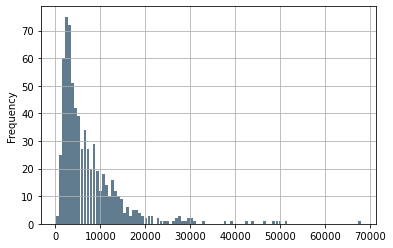

In [25]:
commutes = huang_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [27]:
temp = huang_post[(huang_post['like_count'] <= 70000) & (huang_post['like_count'] > 10000)]
temp

,new_date,message,jieba_results,like_count
0,2019-06-13,是的，623，總來。\n\n昨天上午，我已經將6月23日的凱道路權借下來了。\n昨天深夜，館...,是 的 總來 。 昨天上午 我 已 經將 月 日 的 凱 道路 權借 下來 了 。 ...,67855
1,2019-11-30,揭發國安私菸弊案後，我被綠營痛罵：中共同路人、國民黨側翼，為何不監督韓國瑜？\n\n揭發圈地...,揭發 國安私 菸 弊案 後 我 被 綠營痛 罵 中共 同路人 國民黨 側翼 為 何不 監督...,50946
2,2019-11-28,特權掠奪國家資源、韓李家族發大財\n\n瞭解我問政風格的朋友都知道，我十分痛恨政治人物濫用權...,特權 掠 奪國家 資源 韓李 家族 發大財 瞭解 我 問政風格 的 朋友 都 知道 我 十...,50071
3,2019-06-23,清晨，在凱道最後確認，向徹夜忙碌的智偉與工作人員致謝。\n\n看著被雨水濕透的路面，我說「這...,清晨 在 凱道 最後確 認 向 徹夜 忙碌 的 智偉 與 工作 人員致 謝 。 看著 被 ...,49418
4,2019-06-23,謝謝每一位站出來的朋友\n\n拒絕紅色媒體、守護台灣民主 我們一起繼續努力！,謝謝 每 一位 站 出來 的 朋友 拒絕 紅色 媒體 守護 台灣 民主 我們 一起 繼...,48269
...,...,...,...,...
158,2019-03-19,,,10189
159,2019-10-08,謝謝今周刊製作這個重要的專題。\n\n最後的結語，一針見血，直指臺灣目前金權政治的問題：\n...,謝謝 今 周刊 製 作 這 個 重要 的 專題 。 最後的 結語 一針 見 血 直指 臺 ...,10168
160,2019-03-13,林益世這個大貪官，外役監申請被正式駁回！\n\n感謝大家的共同關注！沒讓矯正署偷偷放他過關。...,林 益世 這個 大 貪官 外役 監申 請 被 正式 駁回 感謝 大家 的 共同 關注 沒 ...,10077
161,2019-06-03,議員違法養雞場、縣政府包庇、農委會跳票\n\n屏東縣議員周碧雲在枋寮鄉違法經營養雞場的劣行，...,議員 違法養 雞場 縣 政府 包庇 農委會 跳票 屏東縣 議員 周碧雲在 枋寮 鄉 違法 ...,10062


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [28]:
corpus = temp['jieba_results'].values.tolist()

In [29]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [30]:
#使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['謝謝', '繼續', '大家', '一位', '包庇', '縣府', '違法', '竟然', '屏東縣', '屏東']
TOP 10 WORDS PER TOPIC #1
['朋友', '剛剛', '我們', '立法院', '未來', '這個', '時代', '力量', '屏東', '中天']
TOP 10 WORDS PER TOPIC #2
['真的', '新竹市', '王敬', '依然', '抽砂', '機場', '議員', '雞場', '鄭宏輝', '樂樂養']
TOP 10 WORDS PER TOPIC #3
['大家', '謝謝', '報導', '媒體', '台灣', '一起', '民主', '紅色', '守護', '我們']
TOP 10 WORDS PER TOPIC #4
['農委會', '今天', '社論', '屏東縣', '違法養', '包庇', '屏東', '政府', '雞場', '枋寮']
TOP 10 WORDS PER TOPIC #5
['一個', '好好', '悲劇', '政黨票', '公平', '公布', '銀行', '支持', '力量', '中科']
TOP 10 WORDS PER TOPIC #6
['毫無長', '這些', '體育署', '許東雄', '公平', '中天', '高興', '基本', '旺旺', '一起']
TOP 10 WORDS PER TOPIC #7
['國有', '資源', '牟利', '家族', '國家', '李家', '砂石', '堤防', '圈地', '韓國瑜']


In [31]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['清楚', '出來', '應該', '中科', '這樣', '過去', '要求', '這個', '處理', '可以']
TOP 10 WORDS PER TOPIC #1
['繼續', '媒體', '朋友', '守護', '大家', '一起', '時代', '台灣', '力量', '我們']
TOP 10 WORDS PER TOPIC #2
['李佳芬', '牟利', '資源', '堤防', '家族', '國家', '李家', '砂石', '圈地', '韓國瑜']
TOP 10 WORDS PER TOPIC #3
['總統', '司法', '希望', '政府', '弊案', '一個', '力量', '未來', '我們', '屏東']
TOP 10 WORDS PER TOPIC #4
['宜蘭縣', '創作', '記者', '檢測', '根本', '金融', '金管會', '高層', '客戶', '銀行']
TOP 10 WORDS PER TOPIC #5
['議長', '違法養', '周典論', '竟然', '雞場', '包庇', '違法', '屏東縣', '政府', '屏東']
TOP 10 WORDS PER TOPIC #6
['電視', '這個', '執照', '廢止', '履行', '依法', '蔡衍明', '大家', '活動', '中天']
TOP 10 WORDS PER TOPIC #7
['法律', '媒體', '違建', '華航', '議員', '包庇', '可以', '總統', '違法', '縣府']


In [34]:
politics_huang = politics[politics.姓名 == "黃 國 昌"].政見.to_string()
politics_huang = re.sub(re_punctuation, "", politics_huang)
politics_huang = re.sub(r'[0-9]','',politics_huang)
politics_huang = re.sub(r'[a-zA-Z]','',politics_huang)
jieba.load_userdict("huang_dict.txt")
words = jieba.lcut(politics_huang, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '一', '、', '改善', '就業', '環境', '，', '提升', '勞動', '條件', ' ', '１', '.', '制定', '最低', '生活', '工資', '專法', '，', '保障', '勞工', '生活', '水準', ' ', '２', '.', '貫徹', '周休', '二日', '...']


In [35]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['專法', '二日', '環境', '周休', '提升', '改善', '制定', '就業', '工資', '最低']
TOP 10 WORDS PER TOPIC #1
['二日', '改善', '專法', '工資', '就業', '制定', '最低', '提升', '勞工', '貫徹']
TOP 10 WORDS PER TOPIC #2
['二日', '周休', '專法', '制定', '就業', '工資', '最低', '改善', '環境', '勞動']
TOP 10 WORDS PER TOPIC #3
['環境', '改善', '提升', '周休', '就業', '制定', '工資', '最低', '條件', '保障']
TOP 10 WORDS PER TOPIC #4
['專法', '二日', '提升', '周休', '環境', '改善', '制定', '就業', '工資', '最低']
TOP 10 WORDS PER TOPIC #5
['環境', '改善', '專法', '工資', '制定', '就業', '最低', '周休', '二日', '水準']
TOP 10 WORDS PER TOPIC #6
['二日', '改善', '提升', '環境', '周休', '專法', '最低', '制定', '就業', '工資']
TOP 10 WORDS PER TOPIC #7
['提升', '改善', '周休', '環境', '就業', '制定', '工資', '最低', '專法', '生活']
